IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

MA Peiran 28717249
ZHOU Runlin 28717281

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de evaluation
from iads import evaluation as ev

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

## Analyse du AGRIBALYSE3-synthese

1. 分类：group d'aliment sous-groupe d'aliment 
2. 运输, 包装，准备工作：Livraison， Matériau d'emballage， Préparation
3. 对环境的影响：col 13-28

分析方法：前两个都使用饼状图分析，表示分布情况
第三个采用classifieur通过不同维度（col）分析对环境影响最大的sous-group : 类似projet 1 5D的那个形式？

In [2]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


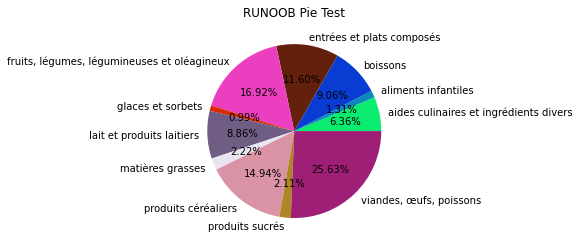

In [3]:
dic={}
for line in data_synthese["Groupe d'aliment"]:
    if line in dic.keys():
        dic[line]+=1
    else:
        dic[line]=1
    
valueOfDic=list(dic.values())
labelOfDic=list(dic.keys())
randomColors = []
for i in range(len(valueOfDic)):
    randomColors.append('#%06X' % random.randint(0, 0xFFFFFF))

plt.pie(valueOfDic, labels=labelOfDic, colors=randomColors, autopct='%.2f%%') 
plt.title("RUNOOB Pie Test") 
plt.show()

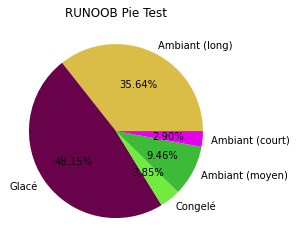

In [4]:
dic={}
for line in data_synthese["Livraison"]:
    if line in dic.keys():
        dic[line]+=1
    else:
        dic[line]=1
    
valueOfDic=list(dic.values())
labelOfDic=list(dic.keys())
randomColors = []
for i in range(len(valueOfDic)):
    randomColors.append('#%06X' % random.randint(0, 0xFFFFFF))

plt.pie(valueOfDic, labels=labelOfDic, colors=randomColors, autopct='%.2f%%') 
plt.title("RUNOOB Pie Test") 
plt.show()

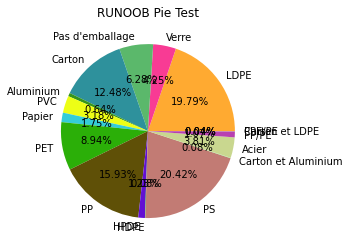

In [5]:
dic={}
for line in data_synthese["Matériau d'emballage"]:
    if line in dic.keys():
        dic[line]+=1
    else:
        dic[line]=1
    
valueOfDic=list(dic.values())
labelOfDic=list(dic.keys())
randomColors = []
for i in range(len(valueOfDic)):
    randomColors.append('#%06X' % random.randint(0, 0xFFFFFF))

plt.pie(valueOfDic, labels=labelOfDic, colors=randomColors, autopct='%.2f%%') 
plt.title("RUNOOB Pie Test") 
plt.show()

In [6]:
data_synthese

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.520,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,"viandes, œufs, poissons",viandes crues,"Veau, steak haché 20% MG, cru","Veal, minced steak, 20% fat, raw",2,0,Glacé,PS,...,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.00,0.000038
2513,6582,6582,"viandes, œufs, poissons",viandes cuites,"Veau, tête, bouillie/cuite à l'eau","Calf, head, boiled/cooked in water",2,0,Glacé,PS,...,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.00,0.000041
2514,26146,26146,"viandes, œufs, poissons",poissons crus,"Vivaneau, cru","Snapper, raw",2,0,Glacé,PS,...,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.60,0.000163
2515,26147,26147,"viandes, œufs, poissons",poissons cuits,"Vivaneau, cuit","Snapper, cooked",2,0,Glacé,PP,...,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.30,0.000203


In [7]:
data_synthese.drop(columns=["Code AGB","Code CIQUAL","Groupe d'aliment","Sous-groupe d'aliment","Nom du Produit en Français","LCI Name"], inplace=True)

In [8]:
for column in data_synthese.columns.tolist():
    print(f"{column}: {data_synthese[column].dtype}")

code saison: int64
code avion: int64
Livraison: object
Matériau d'emballage: object
Préparation: object
DQR: float64
Score unique EF 3.1: float64
Changement climatique: float64
Appauvrissement de la couche d'ozone: float64
Rayonnements ionisants: float64
Formation photochimique d'ozone: float64
Particules fines: float64
Effets toxicologiques sur la santé humaine : substances non-cancérogènes: float64
Effets toxicologiques sur la santé humaine : substances cancérogènes: float64
Acidification terrestre et eaux douces: float64
Eutrophisation eaux douces: float64
Eutrophisation marine: float64
Eutrophisation terrestre: float64
Écotoxicité pour écosystèmes aquatiques d'eau douce: float64
Utilisation du sol: float64
Épuisement des ressources eau: float64
Épuisement des ressources énergétiques: float64
Épuisement des ressources minéraux: float64


In [9]:
# 预处理：填充空值
float_columns = data_synthese.select_dtypes(include='float64').columns

# 遍历浮点列，将空值填充为平均值
for column in float_columns:
    mean_value = data_synthese[column].mean()
    data_synthese[column].fillna(mean_value, inplace=True)
# 删除有空str的行
data_synthese.dropna(inplace=True)

In [10]:
# 预处理：DQR取95%置信区间

# 定义阈值为2倍标准差（95%置信区间）
threshold = 2

# 计算均值和标准差
mean = np.mean(data_synthese['DQR'])
std = np.std(data_synthese['DQR'])

# 计算下限和上限阈值
lower_bound = mean - threshold * std
upper_bound = mean + threshold * std

# 删除超出置信区间的值
data_synthese = data_synthese[(data_synthese['DQR'] >= lower_bound) & (data_synthese['DQR'] <= upper_bound)].copy()

# 删除DQR列
data_synthese.drop(columns=["DQR"], inplace=True)

In [11]:
# 预处理：离群点和异常值
# 定义阈值为3倍标准差
threshold = 3

# 获取浮点类型列的列名
float_columns = data_synthese.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

# 遍历列，将超出阈值的数据改为阈值
for column in float_columns:
    mean = data_synthese[column].mean()
    std = data_synthese[column].std()

    # 计算下限和上限阈值
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # 将超出阈值的数据改为阈值
    data_synthese[column] = np.where(data_synthese[column] < lower_bound, lower_bound, data_synthese[column])
    data_synthese[column] = np.where(data_synthese[column] > upper_bound, upper_bound, data_synthese[column])

(array([1634.,  348.,  193.,  127.,   42.,   37.,    7.,   19.,    2.,
          14.]),
 array([0.013 , 0.6087, 1.2044, 1.8001, 2.3958, 2.9915, 3.5872, 4.1829,
        4.7786, 5.3743, 5.97  ]),
 <BarContainer object of 10 artists>)

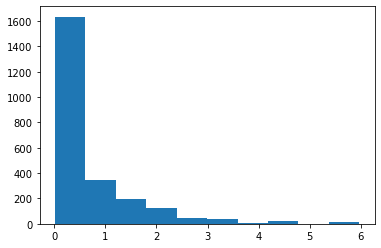

In [12]:
# EF值的分布
plt.hist(data_synthese['Score unique EF 3.1'])

In [13]:
# 以中位数为标准将其转换为二元label
median_value = data_synthese['Score unique EF 3.1'].median()
data_synthese['Score unique EF 3.1'] = ((data_synthese['Score unique EF 3.1'] > median_value)*2-1).astype(int)
# 改名叫label
data_synthese.rename(columns={'Score unique EF 3.1': 'label'}, inplace=True)

In [14]:
data_synthese

,code saison,code avion,Livraison,Matériau d'emballage,Préparation,label,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,2,0,Ambiant (long),LDPE,Pas de préparation,1,6.770,1.020000e-06,5.901202,0.03890,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,216.427614,0.000088
2,2,0,Ambiant (long),Pas d'emballage,Pas de préparation,-1,0.356,5.450000e-08,0.143000,0.00107,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.230000,0.000004
3,2,0,Ambiant (long),LDPE,Pas de préparation,-1,0.815,6.270000e-08,0.141000,0.00256,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.600000,0.000005
4,2,0,Ambiant (long),LDPE,Pas de préparation,1,6.770,1.020000e-06,5.901202,0.03890,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,216.427614,0.000088
5,2,0,Ambiant (long),LDPE,Pas de préparation,1,6.580,9.800000e-07,5.901202,0.03490,...,6.370000e-09,0.09420,0.001860,0.01190,0.11200,43.80,26.0,3.100,216.427614,0.000087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2,0,Glacé,PS,Pas de préparation,1,22.400,7.120000e-07,1.870000,0.04180,...,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.000000,0.000038
2513,2,0,Glacé,PS,Cuisson à l'eau,1,23.600,7.740000e-07,1.680000,0.04380,...,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.000000,0.000041
2514,2,0,Glacé,PS,Pas de préparation,1,4.250,7.760000e-07,0.425000,0.06480,...,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.600000,0.000153
2515,2,0,Glacé,PP,Four,1,5.160,9.570000e-07,1.120000,0.07900,...,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.300000,0.000153


In [15]:
#研究生产运输对EF的影响
data_synthese_pt = data_synthese.iloc[:, :6].copy()

In [16]:
# 提取label
labels = data_synthese_pt['label'].values
data_synthese_pt.drop(columns=['label'], inplace=True)

# str化
int_columns = data_synthese_pt.select_dtypes(include='int64').columns
data_synthese_pt[int_columns] = data_synthese_pt[int_columns].astype(str)

# 离散化
cols = data_synthese_pt.columns
data_synthese_pt = pd.get_dummies(data_synthese_pt, prefix=cols, prefix_sep='_').copy()


In [17]:
data_synthese_pt

,code saison_0,code saison_1,code saison_2,code avion_0,code avion_1,Livraison_Ambiant (court),Livraison_Ambiant (long),Livraison_Ambiant (moyen),Livraison_Congelé,Livraison_Glacé,...,Matériau d'emballage_Verre,Préparation_Cuisson à l'eau,Préparation_Four,Préparation_Four,Préparation_Friture,Préparation_Micro-onde,Préparation_Micro-onde,Préparation_Pas de préparation,Préparation_Poêle,Préparation_Réfrigéré chez le consommateur
0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2513,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2514,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2515,0,0,1,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# 转化为desc
noms = [nom for nom in data_synthese_pt.columns]
desc = np.array(data_synthese_pt[noms])

In [22]:
# knn
acc_max = 0
best_k = 1
for k in range(30)[1:]:
    knn = cl.ClassifierKNN(len(noms),k)
    knn.train(desc[:2000],labels[:2000])
    if knn.accuracy(desc[2000:],labels[2000:]) > acc_max:
        acc_max = 0
        best_k = k
knn = cl.ClassifierKNN(len(noms),best_k)
(res_all, res_moy, res_sd) = ev.validation_croisee(knn, (desc, labels), 10)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [23]:
print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Perf obtenues :  [0.7231404958677686, 0.7603305785123967, 0.7520661157024794, 0.7520661157024794, 0.7489711934156379, 0.7231404958677686, 0.7851239669421488, 0.7520661157024794, 0.8057851239669421, 0.7336065573770492]
Accuracy moyenne:  0.7536296759057151 	écart type:  0.024588868052683083


In [24]:
#研究环境影响对EF的影响
data_synthese_ev = data_synthese.iloc[:, 5:].copy()

In [25]:
labels = data_synthese_ev['label'].values
data_synthese_ev.drop(columns=['label'], inplace=True)

In [26]:
# 归一化

# 对选择的列进行最小-最大标准化
for column in data_synthese_ev.columns:
    min_val = data_synthese_ev[column].min()
    max_val = data_synthese_ev[column].max()
    data_synthese_ev[column] = (data_synthese_ev[column] - min_val) / (max_val - min_val)

In [27]:
data_synthese_ev

,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,0.231132,0.065940,1.000000,0.248428,0.216677,0.124595,0.350456,0.210953,0.270086,0.072473,0.064971,0.174796,0.027798,0.314619,1.000000,0.569654
2,0.010872,0.003357,0.020414,0.006086,0.005459,0.010623,0.013071,0.003192,0.007957,0.010561,0.002653,0.013579,0.024454,0.313659,0.021051,0.020315
3,0.026634,0.003888,0.020074,0.015631,0.019374,0.018368,0.030589,0.016185,0.027608,0.021249,0.015517,0.019906,0.031937,0.340918,0.050718,0.027257
4,0.231132,0.065940,1.000000,0.248428,0.216677,0.124595,0.350456,0.210953,0.270086,0.072473,0.064971,0.174796,0.027798,0.314619,1.000000,0.569654
5,0.224607,0.063347,1.000000,0.222804,0.214850,0.123233,0.344452,0.199257,0.268631,0.064720,0.057228,0.171612,0.027589,0.314619,1.000000,0.567689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,0.767874,0.045975,0.314212,0.267006,0.461173,0.738460,0.586221,0.477405,0.319541,0.862719,0.494977,0.765381,0.652110,0.352806,0.508994,0.246783
2513,0.809082,0.049994,0.281889,0.279818,0.476397,0.763995,0.608051,0.492291,0.332633,0.884870,0.510464,0.793238,0.673011,0.355688,0.532281,0.266430
2514,0.144594,0.050124,0.068388,0.414345,0.219417,0.152513,0.216200,0.201809,0.096555,0.123421,0.125368,0.093212,0.022866,0.284106,0.274267,1.000000
2515,0.175844,0.061856,0.186622,0.505312,0.268438,0.192007,0.269684,0.247741,0.124192,0.151110,0.153760,0.113906,0.024538,0.285115,0.393959,1.000000


In [28]:
noms = [nom for nom in data_synthese_ev.columns]
desc = np.array(data_synthese_ev[noms])

In [29]:
pb = cl.ClassifierPerceptronBiais(len(data_synthese_ev.columns), learning_rate=5e-3, init=True)
(res_all, res_moy, res_sd) = ev.validation_croisee(pb, (desc, labels), 10)

In [30]:
print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Perf obtenues :  [0.8966942148760331, 0.9297520661157025, 0.9338842975206612, 0.9049586776859504, 0.934156378600823, 0.9173553719008265, 0.9297520661157025, 0.9380165289256198, 0.8884297520661157, 0.9057377049180327]
Accuracy moyenne:  0.9178737058725469 	écart type:  0.016850089251217722


## Analyse du AGRIBALYSE3-ingredients

In [2]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv", sep=';') 
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [3]:
data_ingredients

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500000,90.100000,0.310000,8.090000,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310000,9.060000,0.144000,15.300000,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900000,99.200000,0.455000,23.400000,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580000,54.300000,1.950000,1.720000,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231000,0.998000,0.165000,0.138000,1.520000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Viande,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.876827e-09,0.089629,0.000791,0.021372,0.385901,72.852216,283.404190,3.379838,60.658757,1.696759e-05
6852,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Lait demi-écremé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,1.559162e-10,0.002703,0.000026,0.000870,0.011714,2.737303,14.705075,0.076615,0.695539,5.546857e-07
6853,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Farine de blé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.501547e-10,0.003277,0.000048,0.002206,0.014150,4.221226,28.688275,0.095506,1.495995,9.948229e-07
6854,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Autres étapes,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.606422e-10,0.003243,0.000087,0.001362,0.008688,2.725231,4.999133,0.285816,32.821669,6.377483e-06


kg Sb eq/kg de produit这个是资源消耗潜力
MJ/kg de produit这个是能量密度
那我就搞个kg Sb eq/MJ，就是生产一兆焦耳能量所消耗的资源作为label

In [4]:
for column in data_ingredients.columns.tolist():
    print(f"{column}: {data_ingredients[column].dtype}")

Ciqual AGB: object
Ciqual code: object
Groupe d'aliment: object
Sous-groupe d'aliment: object
Nom Français: object
LCI Name: object
Ingredients: object
Code et Nom: object
Groupe: object
Sous-groupe: object
Formation photochimique d'ozone: float64
Particules fines: float64
Effets toxicologiques sur la santé humaine : substances non-cancérogènes: float64
Effets toxicologiques sur la santé humaine : substances cancérogènes: float64
Acidification terrestre et eaux douces: float64
Eutrophisation eaux douces: float64
Eutrophisation marine: float64
Eutrophisation terrestre: float64
Écotoxicité pour écosystèmes aquatiques d'eau douce: float64
Utilisation du sol: float64
Épuisement des ressources eau: float64
Épuisement des ressources énergétiques: float64
Épuisement des ressources minéraux: float64
Pt/kg de produit: float64
m3 depriv./kg de produit: float64
MJ/kg de produit: float64
kg Sb eq/kg de produit: float64


In [5]:
data_ingredients = data_ingredients[['Groupe d\'aliment','Sous-groupe d\'aliment','Ingredients','MJ/kg de produit','kg Sb eq/kg de produit']].copy()




In [6]:
# 预处理：填充空值
float_columns = data_ingredients.select_dtypes(include='float64').columns

# 遍历浮点列，将空值填充为平均值
for column in float_columns:
    mean_value = data_ingredients[column].mean()
    data_ingredients[column].fillna(mean_value, inplace=True)
# 删除有空str的行
data_ingredients.dropna(inplace=True)

In [7]:
# 预处理：离群点和异常值
# 定义阈值为3倍标准差
threshold = 3

# 获取浮点类型列的列名
float_columns = data_ingredients.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

# 遍历整数列，将超出阈值的数据改为阈值
for column in float_columns:
    mean = data_ingredients[column].mean()
    std = data_ingredients[column].std()

    # 计算下限和上限阈值
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # 将超出阈值的数据改为阈值
    data_ingredients[column] = np.where(data_ingredients[column] < lower_bound, lower_bound, data_ingredients[column])
    data_ingredients[column] = np.where(data_ingredients[column] > upper_bound, upper_bound, data_ingredients[column])

In [8]:
data_ingredients

,Groupe d'aliment,Sous-groupe d'aliment,Ingredients,MJ/kg de produit,kg Sb eq/kg de produit
0,aides culinaires et ingrédients divers,ingrédients divers,Fromage frais crémeux,8.090000,1.480000e-05
1,aides culinaires et ingrédients divers,ingrédients divers,Autres étapes,15.300000,2.320000e-06
2,aides culinaires et ingrédients divers,ingrédients divers,Total,23.400000,1.710000e-05
3,aides culinaires et ingrédients divers,ingrédients divers,Huile d'olive,1.720000,1.890000e-06
4,aides culinaires et ingrédients divers,ingrédients divers,Oignons,0.138000,1.520000e-07
...,...,...,...,...,...
6851,"viandes, œufs, poissons",autres produits à base de viande,Viande,60.658757,1.696759e-05
6852,"viandes, œufs, poissons",autres produits à base de viande,Lait demi-écremé,0.695539,5.546857e-07
6853,"viandes, œufs, poissons",autres produits à base de viande,Farine de blé,1.495995,9.948229e-07
6854,"viandes, œufs, poissons",autres produits à base de viande,Autres étapes,32.821669,6.377483e-06


In [9]:
# 搞出label
data_ingredients['label'] = data_ingredients['kg Sb eq/kg de produit'] / data_ingredients['MJ/kg de produit']
data_ingredients.drop(columns=['kg Sb eq/kg de produit','MJ/kg de produit'], inplace=True)
# 以中位数为标准将其转换为二元label
median_value = data_ingredients['label'].median()
data_ingredients['label'] = ((data_ingredients['label'] > median_value)*2-1).astype(int)

In [10]:
# 提取label
labels = data_ingredients['label'].values
data_ingredients.drop(columns=['label'], inplace=True)

In [11]:
# 离散化
cols = data_ingredients.columns
data_ingredients = pd.get_dummies(data_ingredients, prefix=cols, prefix_sep='_').copy()

In [12]:
data_ingredients

,Groupe d'aliment_aides culinaires et ingrédients divers,Groupe d'aliment_aliments infantiles,Groupe d'aliment_boissons,Groupe d'aliment_entrées et plats composés,"Groupe d'aliment_fruits, légumes, légumineuses et oléagineux",Groupe d'aliment_glaces et sorbets,Groupe d'aliment_lait et produits laitiers,Groupe d'aliment_matières grasses,Groupe d'aliment_produits céréaliers,Groupe d'aliment_produits sucrés,...,Ingredients_Viande de bœuf sans os,Ingredients_Viande de moutton sans os,Ingredients_Viande de porc maigre,Ingredients_Viande de poulet sans os,Ingredients_Viande de veau sans os,Ingredients_Vin blanc,Ingredients_Vin rouge,Ingredients_Yaourt,Ingredients_Échalote,Ingredients_Œuf de poule
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
noms = [nom for nom in data_ingredients.columns]
desc = np.array(data_ingredients[noms])

In [16]:
import graphviz as gv
noms1 = [n.encode('utf-8') for n in noms]
arbre = cl.ClassifierArbreDecision(len(noms), 0.75, noms1)
(res_all, res_moy, res_sd) = ev.validation_croisee(arbre, (desc, labels), 10)

In [17]:
print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Perf obtenues :  [0.9562043795620438, 0.9357664233576642, 0.9139941690962099, 0.945985401459854, 0.925764192139738, 0.948905109489051, 0.927007299270073, 0.9037900874635568, 0.9343065693430657, 0.9315866084425036]
Accuracy moyenne:  0.932331023962376 	écart type:  0.015065287829638764


## Analyse du AGRIBALYSE3-etapes

这个表好像是前面几个拼起来的，该分析的都分析了，那就

来knn给大家整个活

草！走！忽略 ጿ ኈ ቼ ዽ ጿ

团长你狗屁才艺

聚类clustering应该是没戏，六千多行每行要算和别的每一行的距离然后重复六千多次^2，复杂度是n^3基本别想了

label 和上题一样

In [50]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-ingredients.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  301


In [51]:
data_etapes

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500000,90.100000,0.310000,8.090000,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310000,9.060000,0.144000,15.300000,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900000,99.200000,0.455000,23.400000,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580000,54.300000,1.950000,1.720000,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231000,0.998000,0.165000,0.138000,1.520000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Viande,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.876827e-09,0.089629,0.000791,0.021372,0.385901,72.852216,283.404190,3.379838,60.658757,1.696759e-05
6852,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Lait demi-écremé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,1.559162e-10,0.002703,0.000026,0.000870,0.011714,2.737303,14.705075,0.076615,0.695539,5.546857e-07
6853,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Farine de blé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.501547e-10,0.003277,0.000048,0.002206,0.014150,4.221226,28.688275,0.095506,1.495995,9.948229e-07
6854,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Autres étapes,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.606422e-10,0.003243,0.000087,0.001362,0.008688,2.725231,4.999133,0.285816,32.821669,6.377483e-06


In [52]:
for column in data_etapes.columns.tolist():
    print(f"{column}: {data_etapes[column].dtype}")

Ciqual AGB: object
Ciqual code: object
Groupe d'aliment: object
Sous-groupe d'aliment: object
Nom Français: object
LCI Name: object
Ingredients: object
Code et Nom: object
Groupe: object
Sous-groupe: object
Formation photochimique d'ozone: float64
Particules fines: float64
Effets toxicologiques sur la santé humaine : substances non-cancérogènes: float64
Effets toxicologiques sur la santé humaine : substances cancérogènes: float64
Acidification terrestre et eaux douces: float64
Eutrophisation eaux douces: float64
Eutrophisation marine: float64
Eutrophisation terrestre: float64
Écotoxicité pour écosystèmes aquatiques d'eau douce: float64
Utilisation du sol: float64
Épuisement des ressources eau: float64
Épuisement des ressources énergétiques: float64
Épuisement des ressources minéraux: float64
Pt/kg de produit: float64
m3 depriv./kg de produit: float64
MJ/kg de produit: float64
kg Sb eq/kg de produit: float64


In [53]:
# 预处理：填充空值
float_columns = data_etapes.select_dtypes(include='float64').columns

# 遍历浮点列，将空值填充为平均值
for column in float_columns:
    mean_value = data_etapes[column].mean()
    data_etapes[column].fillna(mean_value, inplace=True)
# 删除有空str的行
data_etapes.dropna(inplace=True)

In [54]:
# 预处理：离群点和异常值
# 定义阈值为3倍标准差
threshold = 3

# 获取浮点类型列的列名
float_columns = data_etapes.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

# 遍历整数列，将超出阈值的数据改为阈值
for column in float_columns:
    mean = data_etapes[column].mean()
    std = data_etapes[column].std()

    # 计算下限和上限阈值
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # 将超出阈值的数据改为阈值
    data_etapes[column] = np.where(data_etapes[column] < lower_bound, lower_bound, data_etapes[column])
    data_etapes[column] = np.where(data_etapes[column] > upper_bound, upper_bound, data_etapes[column])

In [55]:
data_etapes['combined name'] = data_etapes['LCI Name'].str.cat(data_etapes['Ingredients'])

In [56]:
#删除无用str列，随后以名字合并
data_etapes = data_etapes.iloc[:, 10:].copy()
data_etapes = data_etapes.groupby('combined name').mean()

In [57]:
data_etapes

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
combined name,,,,,,,,,,,,,,,,,
"Abondance cheese, from cow's milkAutres étapes",0.022857,0.223169,3.896763e-08,0.085143,0.000651,1.727981e-08,2.321605e-09,1.090197e-10,0.000878,0.000056,0.000340,0.002443,1.357469,5.514926,0.066287,4.507925,1.266430e-06
"Abondance cheese, from cow's milkJus de cerise",0.041091,0.055823,9.752808e-09,0.005521,0.000538,2.890450e-09,2.778785e-09,1.162573e-10,0.000648,0.000029,0.000245,0.002771,7.764997,80.637792,3.225195,0.710537,3.328668e-07
"Abondance cheese, from cow's milkJus de raisin",0.054927,0.235983,3.722101e-08,0.031149,0.001530,1.623568e-08,6.796145e-08,1.158057e-09,0.002510,0.000085,0.003587,0.011008,8.770829,60.723056,0.194586,2.726680,5.672218e-06
"Abondance cheese, from cow's milkMixage",0.002112,0.006258,6.666539e-10,0.041856,0.000017,3.468326e-10,6.731845e-11,3.836488e-12,0.000031,0.000002,0.000008,0.000060,0.014864,0.031340,0.002142,0.913375,6.287030e-08
"Abondance cheese, from cow's milkPurée de framboise",0.021141,0.105653,1.272860e-08,0.004750,0.000588,1.933076e-08,4.194372e-09,1.862124e-10,0.002757,0.000048,0.000960,0.011480,5.150680,7.507524,0.148528,1.055254,8.289491e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
baked AlaskaSucre blanc,0.016963,0.076582,5.794802e-09,0.004630,0.000302,1.723244e-08,1.087054e-09,6.301488e-11,0.002480,0.000021,0.000793,0.010576,1.228977,4.709278,0.325934,0.773324,6.372371e-07
baked AlaskaTotal,0.223535,1.749729,1.105396e-07,0.972361,0.003821,1.498389e-07,3.714782e-08,1.227636e-09,0.020327,0.000257,0.006318,0.083904,18.474763,76.662864,1.029541,31.056102,1.161512e-05
cream sauce for pizza baseAutres étapes,0.060000,0.399000,5.950000e-08,0.516000,0.001090,2.810000e-08,7.160000e-09,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310000,9.060000,0.144000,15.300000,2.320000e-06


In [58]:
# 搞出label
data_etapes['label'] = data_etapes['kg Sb eq/kg de produit'] / data_etapes['MJ/kg de produit']
data_etapes.drop(columns=['kg Sb eq/kg de produit','MJ/kg de produit','Pt/kg de produit','m3 depriv./kg de produit'], inplace=True)
# 以中位数为标准将其转换为二元label
median_value = data_etapes['label'].median()
data_etapes['label'] = ((data_etapes['label'] > median_value)*2-1).astype(int)

In [59]:
# 提取label
labels = data_etapes['label'].values
data_etapes.drop(columns=['label'], inplace=True)

In [60]:
# 归一化

# 对选择的列进行最小-最大标准化
for column in data_etapes.columns:
    min_val = data_etapes[column].min()
    max_val = data_etapes[column].max()
    data_etapes[column] = (data_etapes[column] - min_val) / (max_val - min_val)

In [61]:
noms = [nom for nom in data_etapes.columns]
desc = np.array(data_etapes[noms])

In [62]:
data_etapes

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
combined name,,,,,,,,,,,,,
"Abondance cheese, from cow's milkAutres étapes",0.018892,0.020948,0.049871,0.032441,0.013734,0.014926,0.010488,0.016183,0.005299,0.045839,0.007715,0.003542,0.014105
"Abondance cheese, from cow's milkJus de cerise",0.033890,0.005240,0.012482,0.002104,0.011360,0.002497,0.012554,0.017257,0.003909,0.023323,0.005561,0.004017,0.080683
"Abondance cheese, from cow's milkJus de raisin",0.045270,0.022151,0.047636,0.011869,0.032291,0.014024,0.307031,0.171903,0.015146,0.069706,0.081364,0.015960,0.091134
"Abondance cheese, from cow's milkMixage",0.001829,0.000587,0.000853,0.015948,0.000349,0.000300,0.000304,0.000569,0.000186,0.001266,0.000184,0.000088,0.000154
"Abondance cheese, from cow's milkPurée de framboise",0.017481,0.009917,0.016290,0.001810,0.012417,0.016697,0.018949,0.027641,0.016633,0.039560,0.021786,0.016644,0.053519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
baked AlaskaSucre blanc,0.014045,0.007189,0.007416,0.001764,0.006373,0.014885,0.004911,0.009354,0.014961,0.016836,0.017980,0.015334,0.012770
baked AlaskaTotal,0.183955,0.164241,0.141469,0.370493,0.080629,0.129425,0.167824,0.182231,0.122641,0.209940,0.143313,0.121649,0.191964
cream sauce for pizza baseAutres étapes,0.049444,0.037453,0.076148,0.196608,0.023003,0.024272,0.032347,0.034735,0.013032,0.073754,0.029487,0.010120,0.024002


In [63]:
# knn
acc_max = 0
best_k = 1
for k in range(30)[1:]:
    knn = cl.ClassifierKNN(len(noms),k)
    knn.train(desc[:2000],labels[:2000])
    if knn.accuracy(desc[2000:2500],labels[2000:2500]) > acc_max:
        acc_max = 0
        best_k = k
knn = cl.ClassifierKNN(len(noms),best_k)
(res_all, res_moy, res_sd) = ev.validation_croisee(knn, (desc, labels), 10)



In [64]:
print("Perf obtenues : ",res_all)
print("Accuracy moyenne: ",res_moy,"\técart type: ", res_sd)

Perf obtenues :  [0.8975109809663251, 0.9019033674963397, 0.9121522693997072, 0.9121522693997072, 0.9210526315789473, 0.9077598828696926, 0.9238653001464129, 0.9150805270863837, 0.8828696925329429, 0.8992700729927007]
Accuracy moyenne:  0.9073616994469159 	écart type:  0.011651657793716215


搞个聚类

In [20]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-ingredients.csv", sep=';')

In [21]:
# 预处理：填充空值
float_columns = data_etapes.select_dtypes(include='float64').columns

# 遍历浮点列，将空值填充为平均值
for column in float_columns:
    mean_value = data_etapes[column].mean()
    data_etapes[column].fillna(mean_value, inplace=True)
# 删除有空str的行
data_etapes.dropna(inplace=True)

In [22]:
# 预处理：离群点和异常值
# 定义阈值为3倍标准差
threshold = 3

# 获取浮点类型列的列名
float_columns = data_etapes.select_dtypes(include='float64').columns
float_columns = float_columns.drop('Score unique EF 3.1', errors='ignore')

# 遍历整数列，将超出阈值的数据改为阈值
for column in float_columns:
    mean = data_etapes[column].mean()
    std = data_etapes[column].std()

    # 计算下限和上限阈值
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std

    # 将超出阈值的数据改为阈值
    data_etapes[column] = np.where(data_etapes[column] < lower_bound, lower_bound, data_etapes[column])
    data_etapes[column] = np.where(data_etapes[column] > upper_bound, upper_bound, data_etapes[column])

In [23]:
data_etapes['groupe'] = data_etapes['Groupe']
#删除无用str列，随后以名字合并
data_etapes = data_etapes.iloc[:, 10:].copy()
data_etapes = data_etapes.groupby('groupe').mean()

In [24]:
# 归一化

# 对选择的列进行最小-最大标准化
for column in data_etapes.columns:
    min_val = data_etapes[column].min()
    max_val = data_etapes[column].max()
    data_etapes[column] = (data_etapes[column] - min_val) / (max_val - min_val)

In [25]:
data_etapes

,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
groupe,,,,,,,,,,,,,,,,,
aides culinaires et ingrédients divers,0.213761,0.219328,0.312446,0.309064,0.158182,0.121848,0.538288,0.310035,0.108664,0.329690,0.256821,0.122316,0.213279,0.326896,0.649130,0.223594,0.554647
aliments infantiles,0.000000,0.000000,0.000000,0.131830,0.095301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.316193,0.020414,0.000000
boissons,0.076582,0.067530,0.884270,0.000000,0.096572,0.038189,0.238033,0.136177,0.021766,0.144974,0.071294,0.025819,0.231806,0.080924,0.463862,0.000000,0.695273
entrées et plats composés,0.285525,0.302581,0.287386,0.363541,0.323470,0.266950,0.339851,0.301524,0.269047,0.334371,0.306856,0.273070,0.203691,0.290914,0.366768,0.295576,0.334283
"fruits, légumes, légumineuses et oléagineux",0.113901,0.083545,0.056230,0.323750,0.064834,0.030933,0.147288,0.221977,0.029780,0.261680,0.114778,0.042788,0.162767,0.163844,0.996667,0.196854,0.222254
glaces et sorbets,0.058786,0.093626,0.017379,0.349975,0.000000,0.033930,0.073259,0.072931,0.037669,0.115687,0.070746,0.054097,0.070599,0.080085,0.000000,0.163050,0.253509
lait et produits laitiers,0.182283,0.274220,0.218321,0.238156,0.136793,0.111421,0.283772,0.267276,0.113100,0.349045,0.253248,0.128880,0.232544,0.275119,0.206297,0.169178,0.297401
matières grasses,0.261522,0.323031,0.304173,0.055692,0.296156,0.152687,0.998703,0.633397,0.129373,0.586067,0.544013,0.156288,0.437315,0.638772,0.342249,0.151855,0.484512
produits céréaliers,0.156819,0.200064,0.006857,0.142170,0.095990,0.093636,0.361873,0.252396,0.099721,0.304082,0.276180,0.120305,0.218884,0.279536,0.419459,0.057015,0.113334


In [26]:
index_array = np.array(data_etapes.index)
data_etapes.reset_index(drop=True, inplace=True)
print(index_array)

['aides culinaires et ingrédients divers' 'aliments infantiles' 'boissons'
 'entrées et plats composés' 'fruits, légumes, légumineuses et oléagineux'
 'glaces et sorbets' 'lait et produits laitiers' 'matières grasses'
 'produits céréaliers' 'produits sucrés' 'viandes, œufs, poissons']


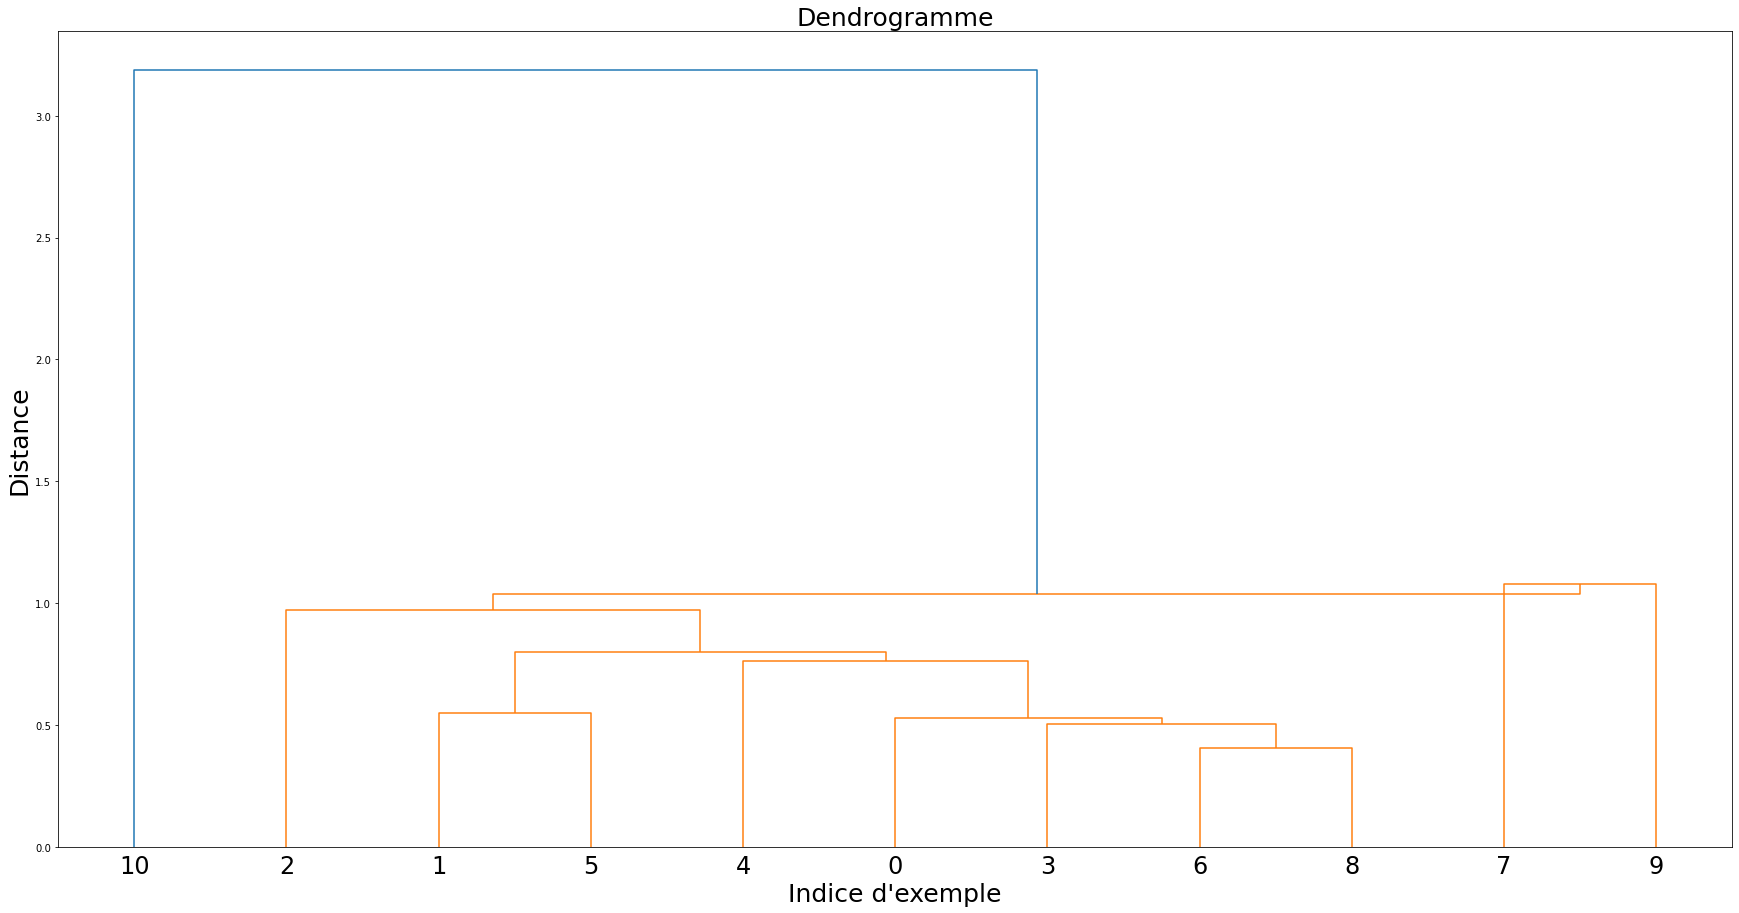

[[6, 8, 0.40408613058962506, 2],
 [3, 11, 0.504098021257663, 3],
 [0, 12, 0.5274743158225639, 4],
 [1, 5, 0.5474958544645658, 2],
 [4, 13, 0.7611640120390206, 5],
 [14, 15, 0.8007635808192438, 7],
 [2, 16, 0.9703134780500582, 8],
 [7, 9, 1.0768693441724124, 2],
 [17, 18, 1.0354981035654371, 10],
 [10, 19, 3.1870303307111985, 11]]

In [27]:
clust.CHA(data_etapes,linkage='centroid',verbose=False,dendrogramme=True)

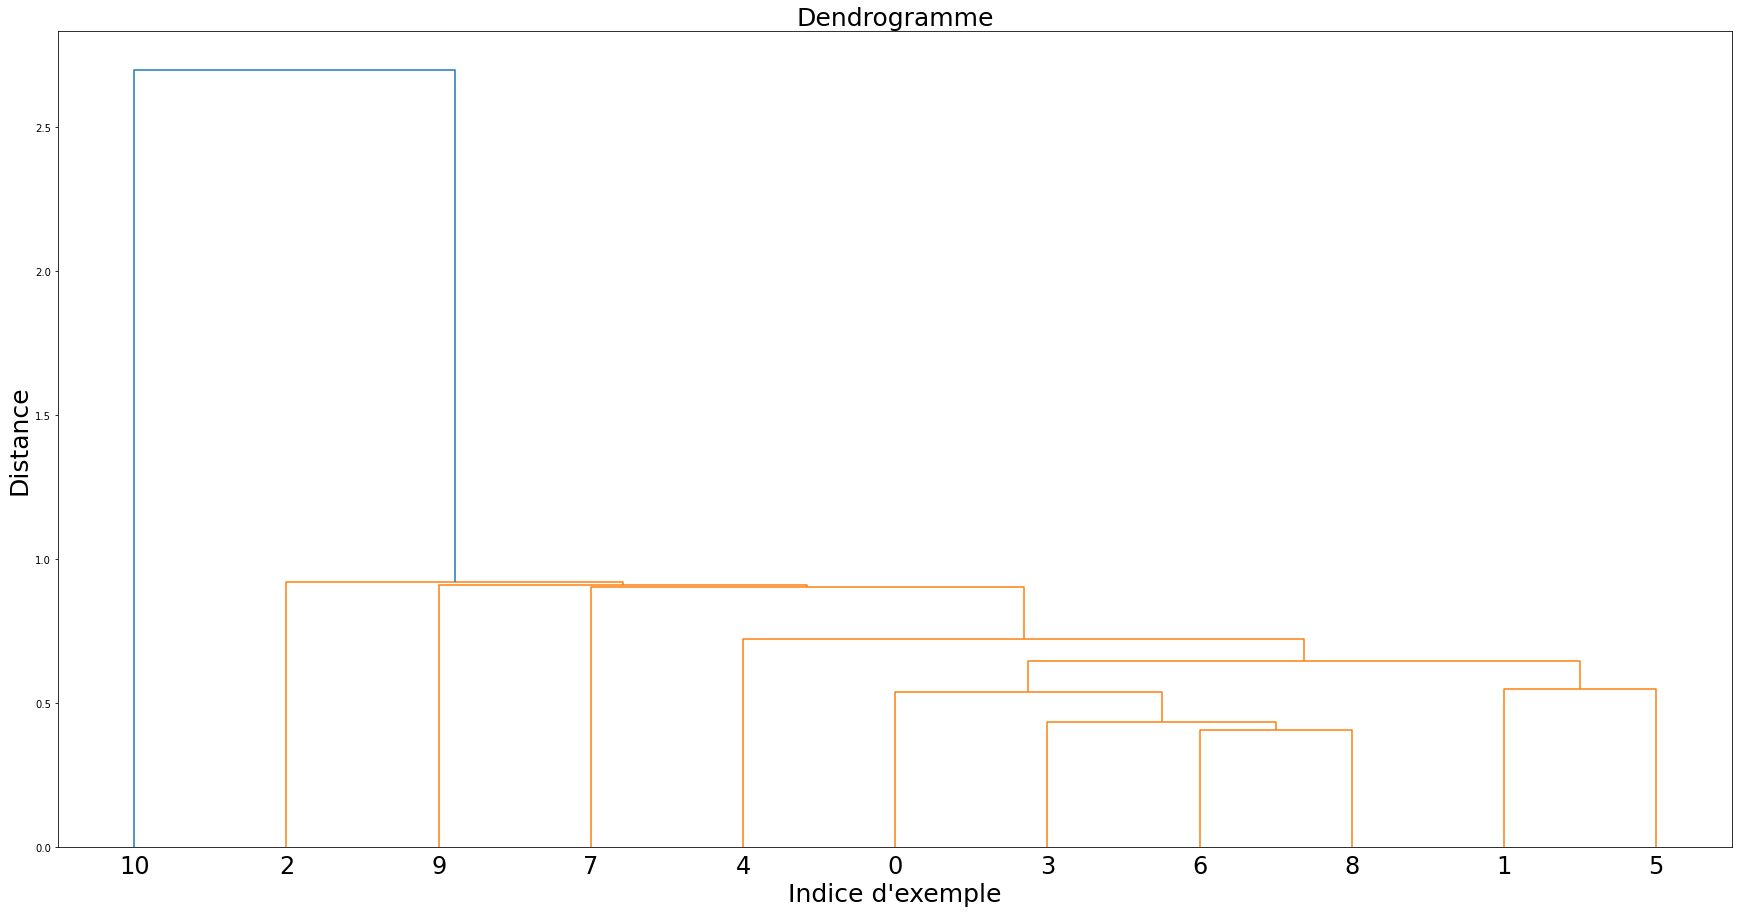

[[6, 8, 0.40408613058962506, 2],
 [3, 11, 0.433219183694631, 3],
 [0, 12, 0.5378964559224022, 4],
 [1, 5, 0.5474958544645658, 2],
 [13, 14, 0.6445017706811987, 6],
 [4, 15, 0.7228923328209635, 7],
 [7, 16, 0.9029533299271735, 8],
 [9, 17, 0.9090396068831219, 9],
 [2, 18, 0.9197174581629247, 10],
 [10, 19, 2.6962478695346173, 11]]

In [28]:
clust.CHA(data_etapes,linkage='simple',verbose=False,dendrogramme=True)

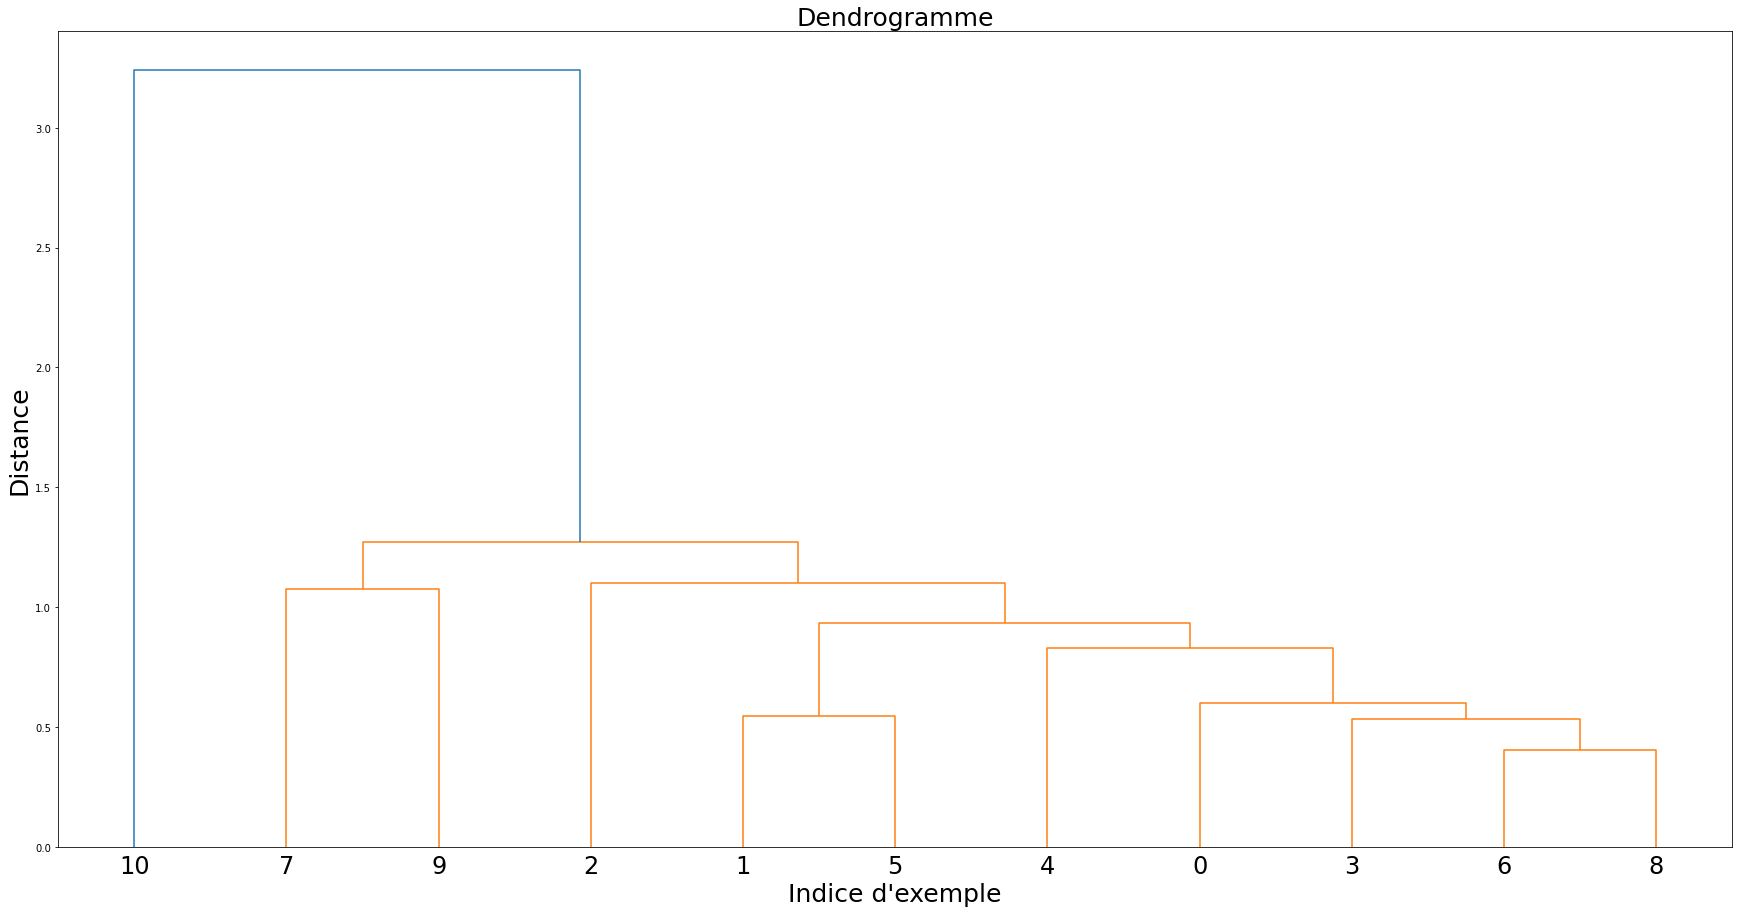

[[6, 8, 0.40408613058962506, 2],
 [3, 11, 0.5337032568022416, 3],
 [1, 5, 0.5474958544645658, 2],
 [0, 12, 0.5993317529048038, 4],
 [4, 14, 0.8281997007699659, 5],
 [13, 15, 0.9338197516987593, 7],
 [7, 9, 1.0768693441724124, 2],
 [2, 16, 1.1023629308913678, 8],
 [17, 18, 1.2734908684804693, 10],
 [10, 19, 3.239937457145513, 11]]

In [29]:
clust.CHA(data_etapes,linkage='average',verbose=False,dendrogramme=True)

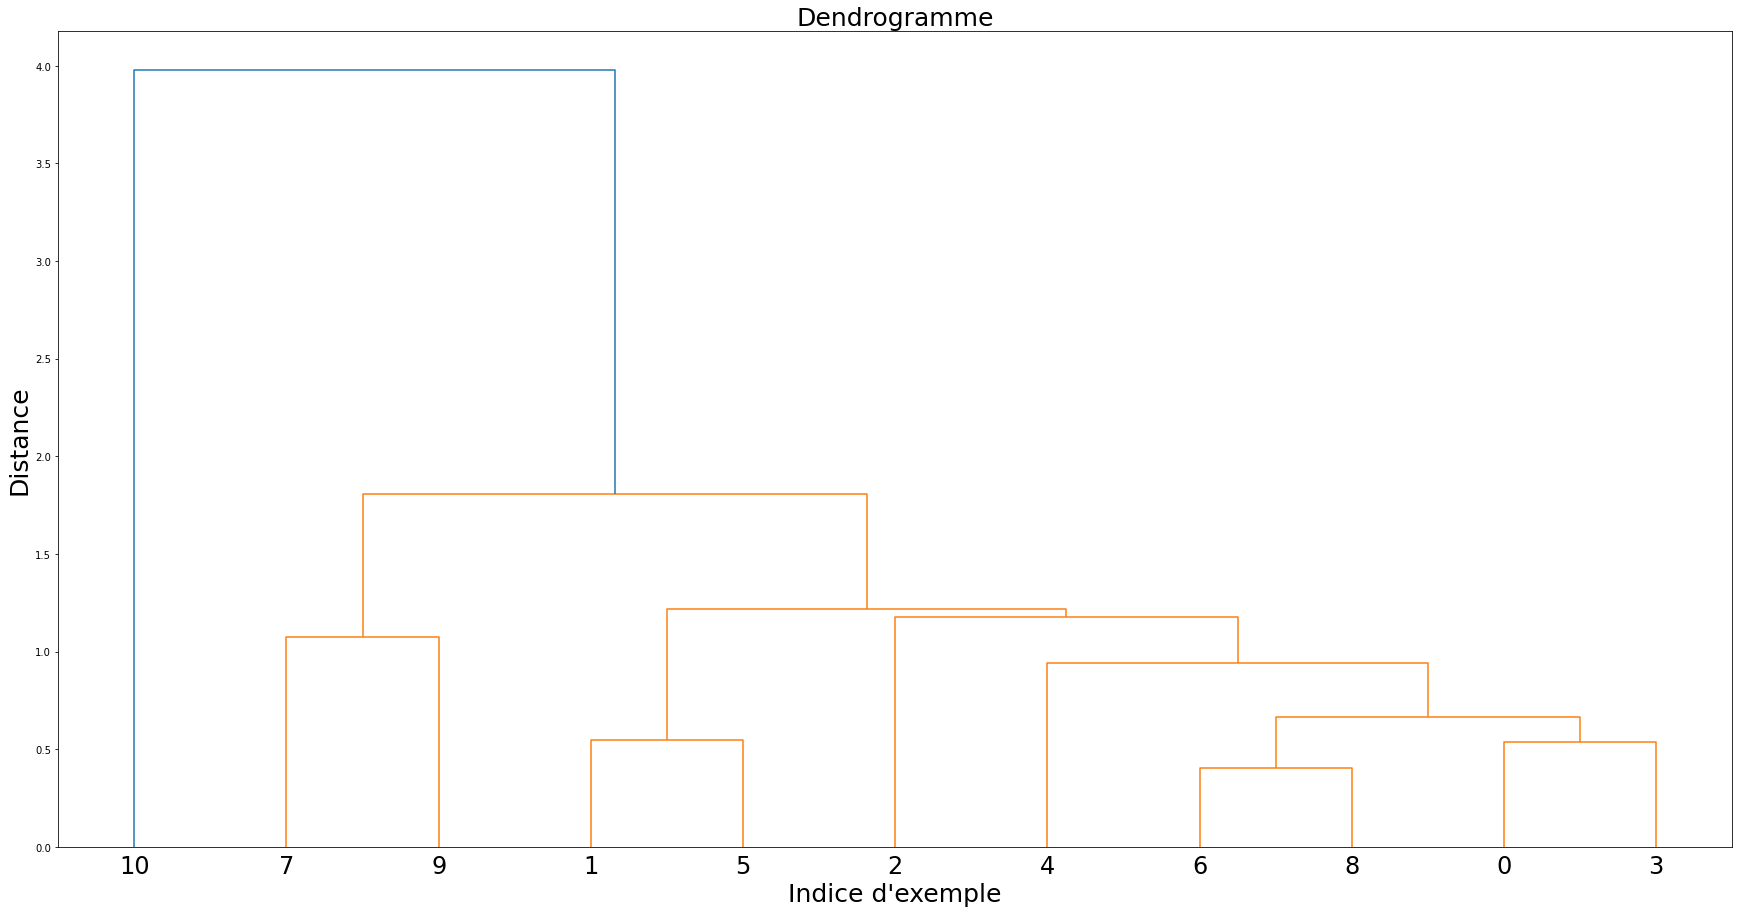

[[6, 8, 0.40408613058962506, 2],
 [0, 3, 0.5378964559224022, 2],
 [1, 5, 0.5474958544645658, 2],
 [11, 12, 0.6652846466958385, 4],
 [4, 14, 0.9422315306122778, 5],
 [7, 9, 1.0768693441724124, 2],
 [2, 15, 1.175863111588029, 6],
 [13, 17, 1.216368333145843, 8],
 [16, 18, 1.807175814477788, 10],
 [10, 19, 3.977474345098902, 11]]

In [30]:
clust.CHA(data_etapes,linkage='complete',verbose=False,dendrogramme=True)

## Exemples

In [18]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  code saison
col  1 :  code avion
col  2 :  Livraison
col  3 :  Matériau d'emballage
col  4 :  Préparation
col  5 :  label
col  6 :  Changement climatique
col  7 :  Appauvrissement de la couche d'ozone
col  8 :  Rayonnements ionisants
col  9 :  Formation photochimique d'ozone
col  10 :  Particules fines
col  11 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0047952556745802e-07
col  12 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.7355304765610585e-09
col  13 :  Acidification terrestre et eaux douces 	moyenne =  0.07613448858208985
col  14 :  Eutrophisation eaux douces 	moyenne =  0.0007213211304287138
col  15 :  Eutrophisation marine 	moyenne =  0.02612156085940711
col  16 :  Eutrophisation terrestre 	moyenne =  0.29318159357625573
col  17 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyenne =  53.232946406992845
col  18 :  Utilisation du sol 	moyenne =  296.3955776709338
col  19 :  

In [19]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [20]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [21]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458406
Transformation 	moyenne =  0.056136918226633324
Emballage 	moyenne =  0.02242675546471597
Transport 	moyenne =  0.026165883152808857
Supermarché et distribution 	moyenne =  0.007877125406877268
Consommation 	moyenne =  0.007633790367775273
Total 	moyenne =  0.6887371596646522
----
Agriculture.1 	moyenne =  4.283405101720905
Transformation.1 	moyenne =  0.4956679004686108
Emballage.1 	moyenne =  0.25511460216686355
Transport.1 	moyenne =  0.31395988182510964
Supermarché et distribution.1 	moyenne =  0.03147132845606259
Consommation.1 	moyenne =  0.042848097985972104
Total.1 	moyenne =  5.422466912623518
----
Agriculture.2 	moyenne =  3.3849700977868863e-07
Transformation.2 	moyenne =  3.3468371653456784e-08
Emballage.2 	moyenne =  8.733627654263909e-08
Transport.2 	moyenne =  7.39595480802746e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368837e-09
Consommation.2 	moyenne =  2.6369538328196176e-09
Total.2 	moye

In [22]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [23]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806696
11 :  Particules fines 	moyennne =  1.1694919040652145
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533415e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506924
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169905
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035612e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091244e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722709e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.015834018204143707
19 :  Utilisation du sol 	moyennne =  0.0001705105635242942
20 :  Épuisement des ressources eau 	moyennn